In [216]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [31]:
from sympy import *
init_printing(use_unicode = False)

# Problem 1

In [2]:
c = 299792458 # speed of light in m/s

The single-term Sellmeier equation:
$$
n^2(\lambda) = 1 + A \frac{\lambda^2}{\lambda^2 - \lambda_0^2}
$$

In [3]:
lambda_0 = 150 # nm

In [228]:
A = (1.44**2 - 1) / (1000**2 / (1000**2 - lambda_0**2))
A

1.0494439999999998

In [5]:
def n(lamb):
    return np.sqrt(1 + A * (lamb**2) / (lamb**2 - lambda_0**2))

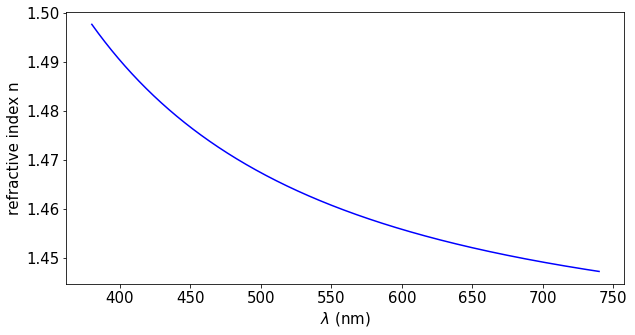

In [238]:
lamb = np.linspace(380, 740, 1000)

plt.figure(figsize=(10,5))
plt.rcParams.update({'font.size': 15})
plt.plot(lamb, n(lamb), 'b')
plt.xlabel("$\lambda$ (nm)")
plt.ylabel("refractive index n")
plt.savefig("refractive-index.eps", dpi = 300, format = 'eps')
plt.show()

In [17]:
x, x0, A = symbols("x x0 A")

In [18]:
f = sqrt(1 + A * x**2 / (x**2 - x0**2))

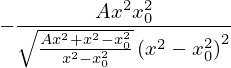

In [25]:
simplify(x*diff(f, x))

In [7]:
def ldndl(lamb):
    return - A * lamb**2 * lambda_0**2 / (lamb**2 - lambda_0**2)**2 / n(lamb)

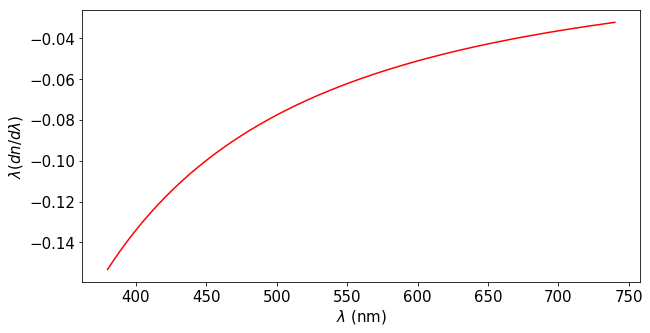

In [240]:
lamb = np.linspace(380, 740, 1000)

plt.figure(figsize=(10,5))
plt.rcParams.update({'font.size': 15})
plt.plot(lamb, ldndl(lamb), 'r')
plt.xlabel("$\lambda$ (nm)")
plt.ylabel("$\lambda (dn/d\lambda)$")
plt.savefig("ldndl.eps", dpi = 300, format = 'eps')
plt.show()

In [11]:
def velocity_diff(lamb):
    return ldndl(lamb)/n(lamb)**2 * c

In [13]:
def phase_velocity(lamb):
    return c / n(lamb)

In [14]:
def group_velocity(lamb):
    return phase_velocity(lamb) + velocity_diff(lamb)

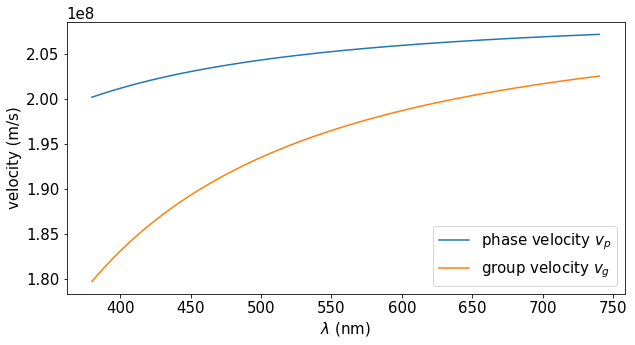

In [241]:
lamb = np.linspace(380, 740, 1000)

plt.figure(figsize=(10,5))
plt.rcParams.update({'font.size': 15})
plt.plot(lamb, phase_velocity(lamb))
plt.plot(lamb, group_velocity(lamb))
#plt.ylim(1e8, 3e8)
plt.legend(["phase velocity $v_p$", "group velocity $v_g$"])
plt.xlabel("$\lambda$ (nm)")
plt.ylabel("velocity (m/s)")
plt.savefig("velocity.eps", dpi = 300, format = 'eps')
plt.show()

# Problem 2

In [46]:
0j

0j

In [67]:
# define electric field

def E(t, t0, omega0, a):
    '''
        t0: related to pulse width
        omega0: carrier frequency
        a: chirping term
    '''
    envelope = np.exp(- t**2 / t0**2 * (1 + a*1j))
    carrier = np.exp(1j * omega0 * t)
    return envelope * carrier

def E_delay(time, cutoff, t0, omega0, a):
    result = time.copy() * 0j
    i = 0
    for t in time:
        if np.abs(t) > cutoff:
            result[i] = 0j
        else:
            result[i] = E(t, t0, omega0, a)
        i = i + 1
    return result
    
def kernel(tau, t, cutoff, t0, omega0, a):
    return E_delay(t - tau, cutoff, t0, omega0, a) + E_delay(t, cutoff, t0, omega0, a)

In [82]:
t = np.linspace(-100, 100, 2000)
debug = E_delay(t, 100, 20, 2.355, 1)
debug[200]

(-1.1137838304427628e-07+1.8994359686509374e-08j)

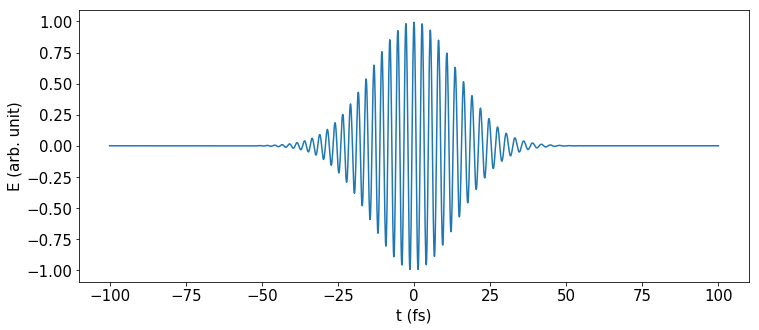

In [78]:
t = np.linspace(-100, 100, 2000)

plt.figure(figsize=(12,5))
#plt.rcParams.update({'font.size': 15})
plt.plot(t, E_delay(t, 100, 20, 2.355, 1).real)
plt.xlabel("t (fs)")
plt.ylabel("E (arb. unit)")
plt.show()

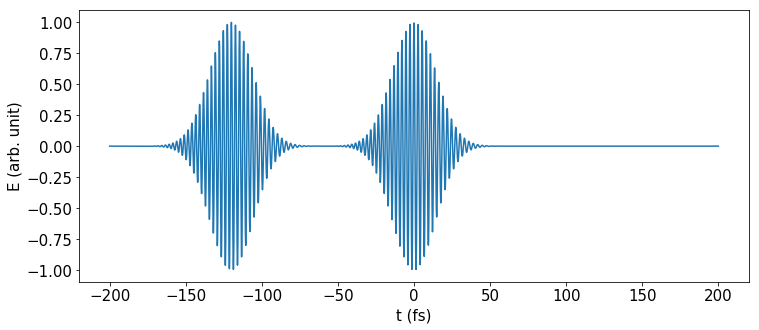

In [191]:
t = np.linspace(-200, 200, 4000)

plt.figure(figsize=(12,5))
#plt.rcParams.update({'font.size': 15})
plt.plot(t, kernel(-120, t, 100, 20, 2.355, 1).real)
plt.xlabel("t (fs)")
plt.ylabel("E (arb. unit)")
plt.show()

In [51]:
c / 800e-9 / 1e15 * 2 * np.pi

2.3545644591360664

In [52]:
800e-9 / c

2.6685127615852163e-15

In [192]:
t = np.linspace(-200, 200, 4000)
debug = kernel(120, t, 100, 20, 2.355, 1)
dg = np.square(debug)
test = np.square(np.absolute(dg))
np.trapz(test, t)

35.449077018101406

In [193]:
283.6 / 35.45

8.0

In [197]:
t = np.linspace(-200, 200, 4000)
tau = np.linspace(-120, 120, 2000)

G = tau.copy()*1j

i = 0
for tt in tau:
    K = kernel(tt, t, 100, 20, 2.355, 1)
    K2 = np.square(K)
    K22 = np.square(np.absolute(K2))
    G[i] = np.trapz(K22, t)
    i = i + 1
    if i%100 == 0:
        print(i)

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000


In [210]:
G1 = G.real

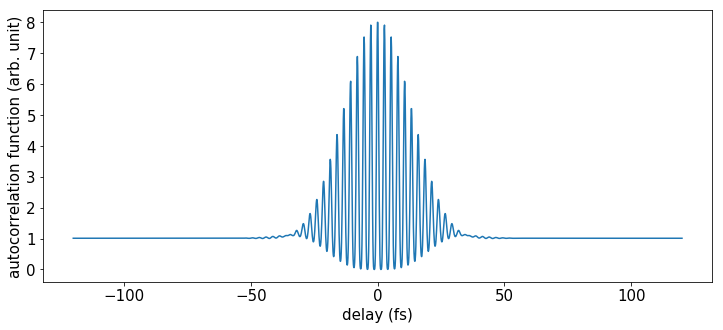

In [211]:
plt.figure(figsize=(12,5))
#plt.rcParams.update({'font.size': 15})
plt.plot(tau, G1/G1.max()*8)
plt.xlabel("delay (fs)")
plt.ylabel("autocorrelation function (arb. unit)")
plt.show()

In [212]:
t = np.linspace(-200, 200, 4000)
tau = np.linspace(-120, 120, 2000)

G = tau.copy()*1j

i = 0
for tt in tau:
    K = kernel(tt, t, 100, 20, 2.355, 0)
    K2 = np.square(K)
    K22 = np.square(np.absolute(K2))
    G[i] = np.trapz(K22, t)
    i = i + 1
    if i%100 == 0:
        print(i)

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000


In [213]:
G0 = G.real

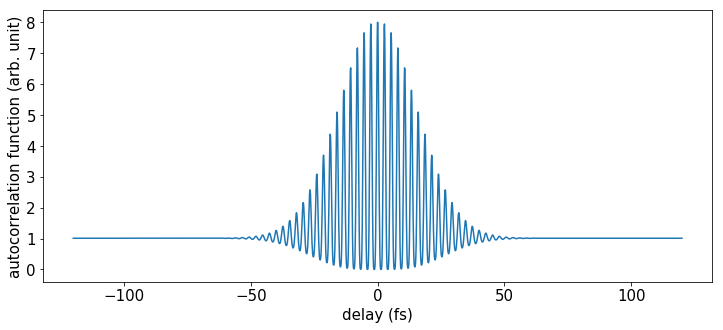

In [214]:
plt.figure(figsize=(12,5))
#plt.rcParams.update({'font.size': 15})
plt.plot(tau, G0/G0.max()*8)
plt.xlabel("delay (fs)")
plt.ylabel("autocorrelation function (arb. unit)")
plt.show()

In [226]:
start_time = time.time()

t = np.linspace(-200, 200, 4000)
tau = np.linspace(-120, 120, 2000)

G = tau.copy()*1j

i = 0
for tt in tau:
    K = kernel(tt, t, 100, 20, 2.355, 2)
    K2 = np.square(K)
    K22 = np.square(np.absolute(K2))
    G[i] = np.trapz(K22, t)
    i = i + 1
    if i%100 == 0:
        percentage = i / len(tau) * 100
        print("{0:.1f}%".format(percentage))
        
elapsed_time = time.time() - start_time
print("Time consuming: {0:.3f}s.".format(elapsed_time))

G2 = G.real

5.0%
10.0%
15.0%
20.0%
25.0%
30.0%
35.0%
40.0%
45.0%
50.0%
55.0%
60.0%
65.0%
70.0%
75.0%
80.0%
85.0%
90.0%
95.0%
100.0%
Time consuming: 64.950s.


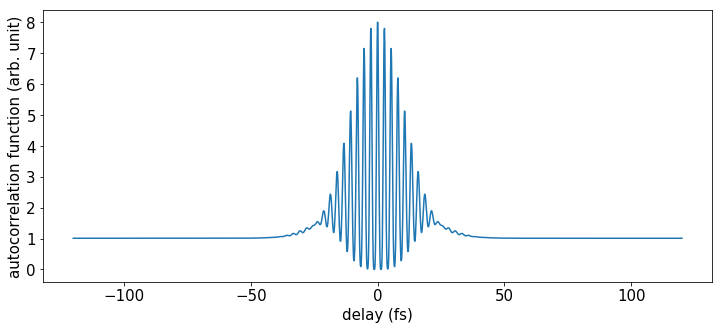

In [227]:
plt.figure(figsize=(12,5))
#plt.rcParams.update({'font.size': 15})
plt.plot(tau, G2/G2.max()*8)
plt.xlabel("delay (fs)")
plt.ylabel("autocorrelation function (arb. unit)")
plt.show()

In [223]:
start_time = time.time()

t = np.linspace(-200, 200, 4000)
tau = np.linspace(-120, 120, 2000)

G = tau.copy()*1j

i = 0
for tt in tau:
    K = kernel(tt, t, 100, 20, 2.355, 3)
    K2 = np.square(K)
    K22 = np.square(np.absolute(K2))
    G[i] = np.trapz(K22, t)
    i = i + 1
    if i%100 == 0:
        percentage = i / len(tau) * 100
        print("{0:.1f}%".format(percentage))
        
elapsed_time = time.time() - start_time
print("Time consuming: {0:.3f}s.".format(elapsed_time))

5.0%
10.0%
15.0%
20.0%
25.0%
30.0%
35.0%
40.0%
45.0%
50.0%
55.0%
60.0%
65.0%
70.0%
75.0%
80.0%
85.0%
90.0%
95.0%
100.0%
Time consuming: 65.501s.


In [224]:
G3 = G.real

In [218]:
G5 = G.real

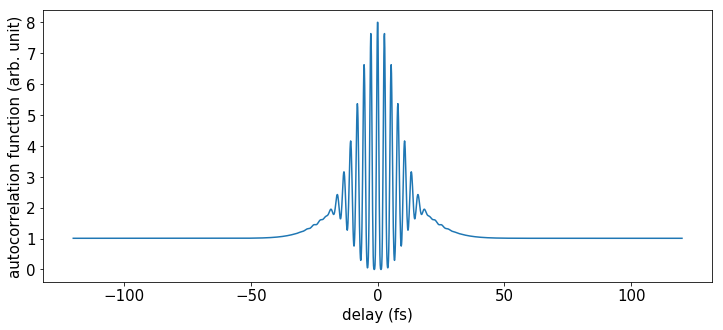

In [225]:
plt.figure(figsize=(12,5))
#plt.rcParams.update({'font.size': 15})
plt.plot(tau, G3/G3.max()*8)
plt.xlabel("delay (fs)")
plt.ylabel("autocorrelation function (arb. unit)")
plt.show()

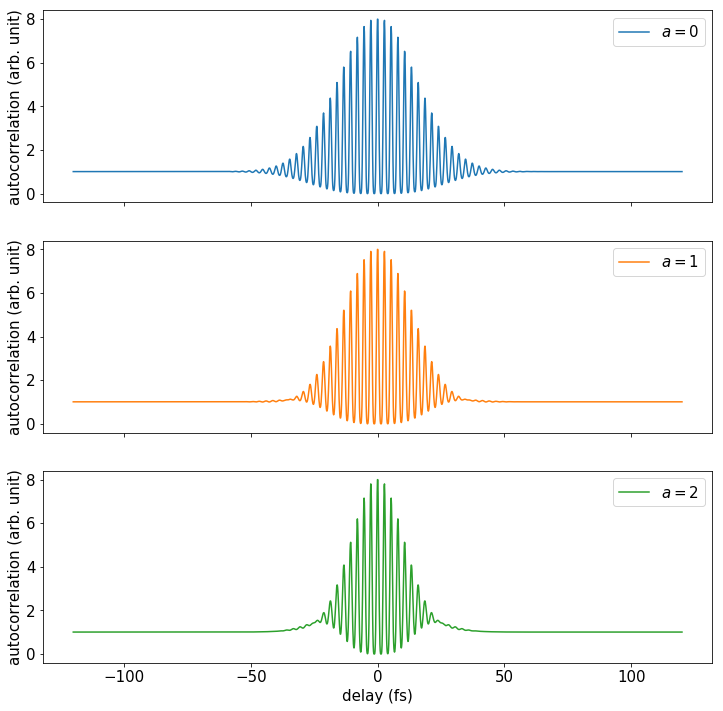

In [254]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex='col', sharey=True, figsize=(12,12))
plt.rcParams.update({'font.size': 15})
ax1.plot(tau, G0/G0.max()*8, color = 'C0')
ax2.plot(tau, G1/G1.max()*8, color = 'C1')
ax3.plot(tau, G2/G2.max()*8, color = 'C2')
ax3.set_xlabel("delay (fs)")
ax1.set_ylabel("autocorrelation (arb. unit)")
ax1.legend(["$a = 0$"])
ax2.set_ylabel("autocorrelation (arb. unit)")
ax2.legend(["$a = 1$"])
ax3.set_ylabel("autocorrelation (arb. unit)")
ax3.legend(["$a = 2$"])
#plt.savefig("autocorrelation.eps", dpi = 300, format = 'eps')
plt.show()